In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#obtaining the data of the camera chosen
camera = '/content/drive/MyDrive/AY 2023-2024/1st Semester/App Physics 167/camera_8.spectra.txt'
camera_spectra = pd.read_csv(camera, delim_whitespace=True, header = None)

# Display the DataFrame
camera_spectra.head(7)


,0,1,2,3
0,400,0.0,0.0,0.000000
1,404,0.0,0.0,0.000000
2,408,0.0,0.0,0.000000
3,412,0.0,0.0,0.000000
4,416,0.0,0.0,0.000000
5,420,0.0,0.0,0.166299
6,424,0.0,0.0,0.401503


In [3]:
macbeth= '/content/drive/MyDrive/AY 2023-2024/1st Semester/App Physics 167/MacbethColorChecker.xls'
macbeth_color_checker = pd.read_excel(macbeth)
macbeth_color_checker = macbeth_color_checker.T
macbeth_color_checker.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
1,0.065,0.068,0.068,0.067,0.064,0.062,0.059,0.057,0.055,0.054,...,0.196,0.204,0.213,0.222,0.231,0.242,0.251,0.261,0.271,0.282
2,0.182,0.192,0.197,0.199,0.201,0.203,0.205,0.208,0.212,0.217,...,0.597,0.605,0.614,0.624,0.637,0.652,0.668,0.682,0.697,0.713
3,0.266,0.300,0.320,0.330,0.336,0.337,0.337,0.337,0.335,0.334,...,0.115,0.112,0.110,0.108,0.106,0.105,0.104,0.104,0.103,0.103
4,0.050,0.049,0.049,0.050,0.050,0.051,0.052,0.053,0.054,0.056,...,0.095,0.095,0.097,0.101,0.110,0.125,0.147,0.174,0.210,0.247
5,0.328,0.385,0.418,0.437,0.446,0.448,0.448,0.447,0.444,0.440,...,0.351,0.384,0.417,0.446,0.470,0.490,0.504,0.511,0.517,0.520


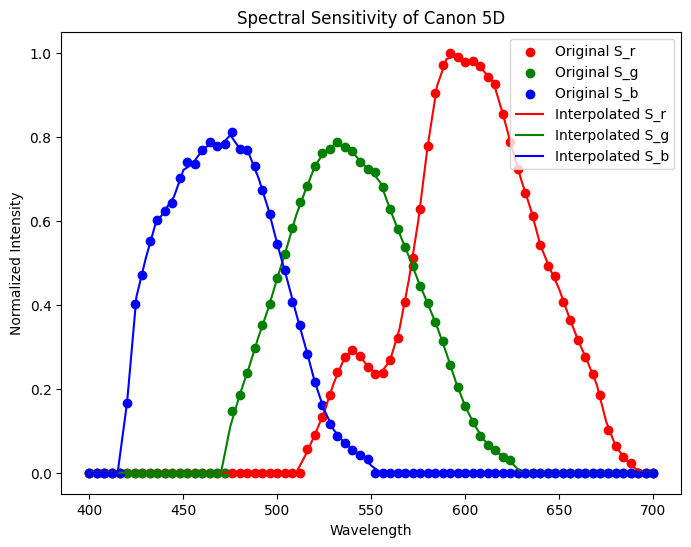

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Extract columns from the dataframe
wavelength = camera_spectra.iloc[:, 0]
column2 = camera_spectra.iloc[:, 1]
column3 = camera_spectra.iloc[:, 2]
column4 = camera_spectra.iloc[:, 3]

# Define the new x values in steps of 5
new_wavelength = np.arange(wavelength.min(), wavelength.max() + 5, 5)

# Interpolate each column separately
interp_column2 = interp1d(wavelength, column2, kind='linear', fill_value='extrapolate')(new_wavelength)
interp_column3 = interp1d(wavelength, column3, kind='linear', fill_value='extrapolate')(new_wavelength)
interp_column4 = interp1d(wavelength, column4, kind='linear', fill_value='extrapolate')(new_wavelength)

# Plotting the original and interpolated data
plt.style.use('default')
plt.figure(figsize=[8,6])
plt.scatter(wavelength, column2, label='Original S_r', marker='o', color = 'red')
plt.scatter(wavelength, column3, label='Original S_g', marker='o',color = 'green')
plt.scatter(wavelength, column4, label='Original S_b', marker='o', color ='blue')
plt.plot(new_wavelength, interp_column2, label='Interpolated S_r', color = 'red')
plt.plot(new_wavelength, interp_column3, label='Interpolated S_g',color = 'green')
plt.plot(new_wavelength, interp_column4, label='Interpolated S_b',color = 'blue')
plt.xlabel('Wavelength')
plt.ylabel('Normalized Intensity')
plt.title('Spectral Sensitivity of Canon 5D')
plt.legend()
plt.savefig("SpectralSensitivity.png")
plt.show()
files.download('SpectralSensitivity.png')


In [5]:
interpolated_df = pd.DataFrame({
    'wavelength': new_wavelength,
    'S_r': interp_column2,
    'S_g': interp_column3,
    'S_b': interp_column4
})
interpolated_df = interpolated_df.iloc[:, 1:]
interpolated_df = interpolated_df.T

interpolated_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
S_r,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.374367,0.316166,0.265619,0.210132,0.121945,0.064216,0.032978,0.01151,0.0,0.0
S_g,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
S_b,0.0,0.0,0.0,0.0,0.166299,0.418687,0.510987,0.589996,0.623505,0.65725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0


In [6]:
D65_values = [
    82.7549, 87.1204, 91.486, 92.4589, 93.4318, 90.057, 86.6823, 95.7736,
    104.865, 110.936, 117.008, 117.41, 117.812, 116.336, 114.861, 115.392,
    115.923, 112.367, 108.811, 109.082, 109.354, 108.578, 107.802, 106.296,
    104.79, 106.239, 107.689, 106.047, 104.405, 104.225, 104.046, 102.023,
    100, 98.1671, 96.3342, 96.0611, 95.788, 92.2368, 88.6856, 89.3459,
    90.0062, 89.8026, 89.5991, 88.6489, 87.6987, 85.4936, 83.2886, 83.4939,
    83.6992, 81.863, 80.0268, 80.1207, 80.2146, 81.2462, 82.2778, 80.281,
    78.2842, 74.0027, 69.7213, 70.6652, 71.6091
]

D65_df = pd.DataFrame({'D65_values': D65_values})

In [7]:
print(interpolated_df.shape)
print(D65_df.shape)
print(macbeth_color_checker.shape)

(3, 61)
(61, 1)
(24, 61)


In [8]:
#converting to numpy arrays
interpolated_df = np.array(interpolated_df)
D65_df = np.array(D65_df)
macbeth_color_checker = np.array(macbeth_color_checker)

#solving the digital numbers
def solve_DN(P, R, S):
  DN = []
  for i in range(len(S)):
    dn = np.sum(P*R*S[i])/np.sum(P*S[i])
    DN.append(dn)
  return np.array(DN)

DNs = {}
for i in range(len(macbeth_color_checker)):
  DNs[str(i)] = solve_DN(D65_df, macbeth_color_checker[i], interpolated_df)
DNs = pd.DataFrame(DNs)
factor = 0.8
DNs = factor*255*DNs/np.max(DNs, axis = 0)
DNs = DNs.astype(dtype = np.uint8)

DNs['18'] *= 1
DNs['19'] *= 0.8
DNs['20'] *= 0.6
DNs['21'] *= 0.4
DNs['22'] *= 0.2
DNs['23'] *= 0.1

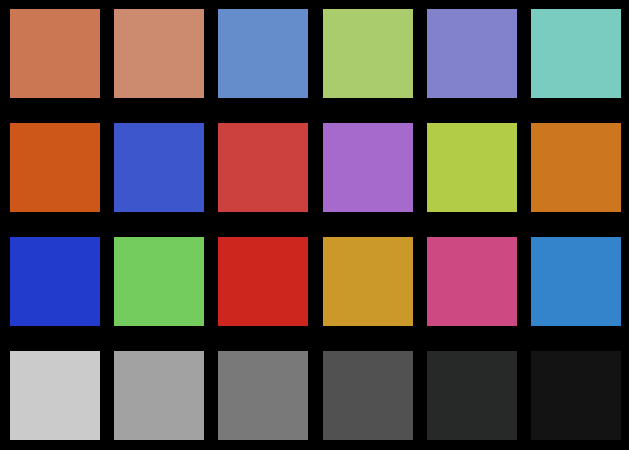

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
def create_square(DN):
    DN = np.array(DN, dtype = np.uint8)
    square = np.zeros((32,32,3), dtype = np.uint8)
    square[...,:] = DN
    return square

plt.style.use('dark_background')
fig, ax = plt.subplots(4, 6)
row = 0
col = 1
for i in range(len(DNs.columns)):
    disp = create_square(DNs[str(i)])
    ax[row, col - 1].imshow(disp)
    ax[row, col - 1].axis('off')

    if col%6 ==0:
        col = 0
        row += 1
    col += 1
fig.tight_layout()
plt.savefig("MacbethWannaBe.png")
plt.show()
files.download('MacbethWannaBe.png')
